In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import yfinance as yf
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

In [2]:
stock_names=['JPM','AAL']
end_date=datetime.today()
n_years=3
start_date=end_date-timedelta(days=n_years*365)
stock_date=yf.download(tickers=stock_names,start=start_date,end=end_date)
stock_prices=stock_date['Adj Close']
df=pd.concat([stock_prices[stock_names[0]],stock_prices[stock_names[1]]],axis=1)
df.columns=[stock_names[0],stock_names[1]]
df

[*********************100%***********************]  2 of 2 completed


,JPM,AAL
Date,,
2021-01-19,126.890175,15.97
2021-01-20,124.987366,16.17
2021-01-21,123.939430,15.83
2021-01-22,122.983452,15.82
2021-01-25,121.448334,15.43
...,...,...
2024-01-10,171.020004,14.35
2024-01-11,170.300003,14.59
2024-01-12,169.050003,13.21


In [3]:
kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=0.001)

mean, cov = kf.filter(df.JPM.values)
mean, std = mean.squeeze(), np.std(cov.squeeze())
mean

array([ 63.44508743,  83.9865141 ,  94.00716311,  99.83596535,
       103.47035196, 105.99970939, 107.46622313, 108.8447221 ,
       109.81453634, 110.69259952, 111.74512062, 112.75239827,
       113.83498766, 114.75929672, 115.70494094, 116.51002236,
       117.23329847, 117.8624745 , 118.53329208, 119.31163367,
       120.0441412 , 120.73887975, 121.48799846, 122.24123733,
       122.99093282, 123.79837076, 124.46737674, 124.93409249,
       125.50113425, 126.01528786, 126.60806822, 127.08069697,
       127.54004436, 128.04634864, 128.48824755, 129.02263503,
       129.5027605 , 130.02195144, 130.49041149, 130.87528893,
       131.29491408, 131.77969186, 132.16194537, 132.39360634,
       132.56727384, 132.77059333, 133.02652744, 133.35185386,
       133.58917015, 133.87306495, 134.07657771, 134.317814  ,
       134.57489534, 134.78931249, 135.06878469, 135.34383679,
       135.64410513, 135.92363662, 136.13719291, 136.25668906,
       136.40076501, 136.57360399, 136.72108457, 136.76

In [4]:
#Moving parameters
df['moving_average_1']=mean

In [5]:
kf = KalmanFilter(transition_matrices = [1],
              observation_matrices = [1],
              initial_state_mean = 0,
              initial_state_covariance = 1,
              observation_covariance=1,
              transition_covariance=0.01)

mean, cov = kf.filter(df.JPM.values)
mean, std = mean.squeeze(), np.std(cov.squeeze())
mean

array([ 63.44508743,  84.23089003,  94.47655583, 100.50205772,
       104.29851309, 106.97211908, 108.51071617, 110.00476727,
       111.05058066, 112.02292456, 113.26523313, 114.48362193,
       115.84536744, 117.00596712, 118.23029277, 119.25833871,
       120.17724999, 120.95929479, 121.83732873, 122.92988417,
       123.94994696, 124.90990611, 125.98947795, 127.08478712,
       128.17803491, 129.39792943, 130.31547451, 130.79100466,
       131.51321903, 132.12272575, 132.92804696, 133.44995442,
       133.95250306, 134.58216194, 135.05702552, 135.77545253,
       136.35439776, 137.03827054, 137.5886846 , 137.9239016 ,
       138.36540506, 138.98879073, 139.3332688 , 139.28022317,
       139.10016695, 139.0386935 , 139.15185657, 139.47637961,
       139.55926622, 139.79167678, 139.80521813, 139.94688999,
       140.14633   , 140.23180133, 140.5193626 , 140.79628034,
       141.14888625, 141.43892285, 141.53777032, 141.37389187,
       141.31004403, 141.35166141, 141.3321453 , 141.01

In [6]:
#Moving parameters
df['moving_average_2']=mean

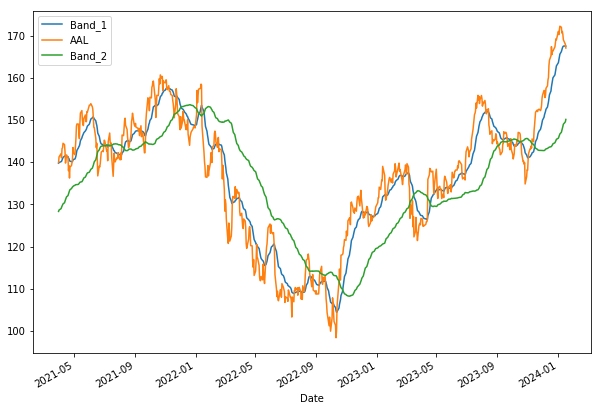

In [7]:
(df.moving_average_1+(df.moving_average_2-df.moving_average_1))[50:].plot(label='Band_1',figsize=(10,7))
df.JPM[50:].plot(label='AAL',figsize=(10,7))
(df.moving_average_1-(df.moving_average_2-df.moving_average_1))[50:].plot(label='Band_2',figsize=(10,7))
plt.legend()
plt.show()